In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

## Load Data

In [2]:
# Load labor capacity data
ds_mean = xr.open_dataset('../data/processed/GFDL/labor_mean_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [3]:
# Population data
ds_pop = xr.open_dataset('../data/processed/GFDL/population_regrid_esm2m.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

# Spatial Maps

## Daily Mean WBGT

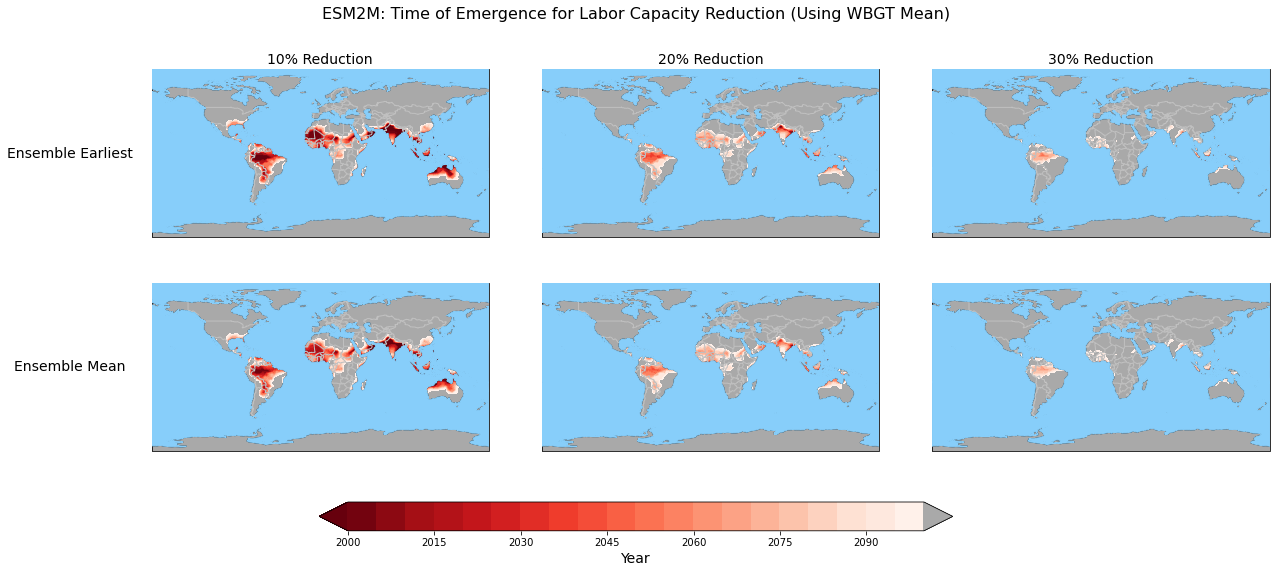

In [6]:
lf.spatial_toe(ds_mean['capacity'],'ESM2M: Time of Emergence for Labor Capacity Reduction (Using WBGT Mean)')
plt.savefig('esm2m_toe_mean_map.png')

## Daily Max WBGT

In [11]:
# Load labor capacity data
ds_max = xr.open_dataset('../data/processed/GFDL/labor_max_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'})

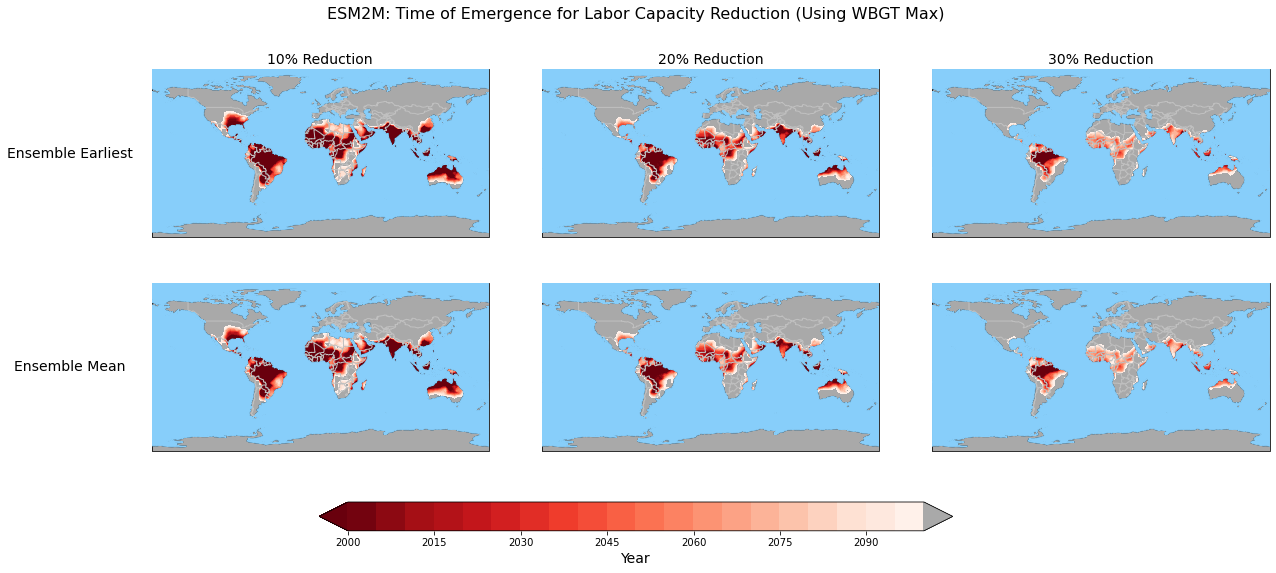

In [74]:
lf.spatial_toe(ds_max['capacity'],'ESM2M: Time of Emergence for Labor Capacity Reduction (Using WBGT Max)')
plt.savefig('esm2m_toe_max_map.png')

## Difference: Daily Mean

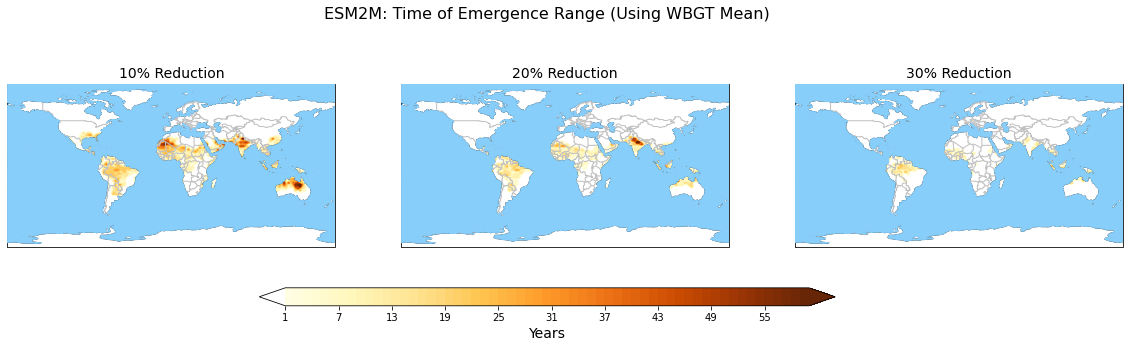

In [39]:
lf.spatial_toe_diff(ds_mean['capacity'],'ESM2M: Time of Emergence Range (Using WBGT Mean)')
plt.savefig('esm2m_toe_range_mean.png')

## Difference: Daily Max

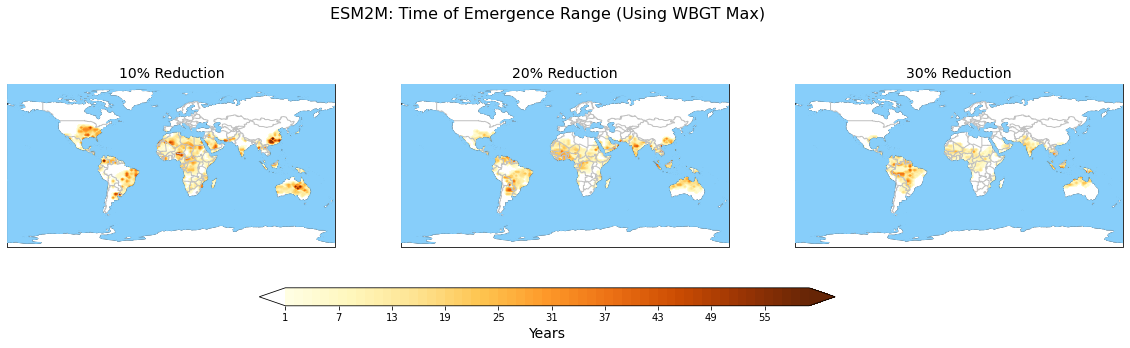

In [40]:
lf.spatial_toe_diff(ds_max['capacity'],'ESM2M: Time of Emergence Range (Using WBGT Max)')
plt.savefig('esm2m_toe_range_max.png')

# Bar Charts: Average ToE

## Daily Mean WBGT

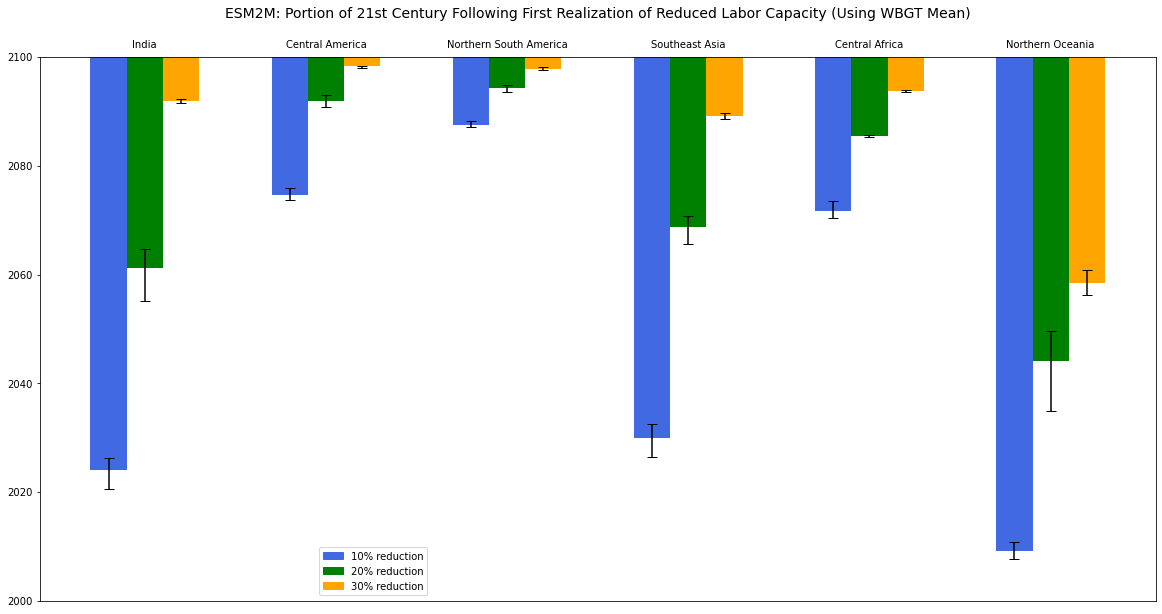

In [11]:
lf.average_toe_bar(ds_mean['capacity'],ds_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n')

## Daily Max WBGT

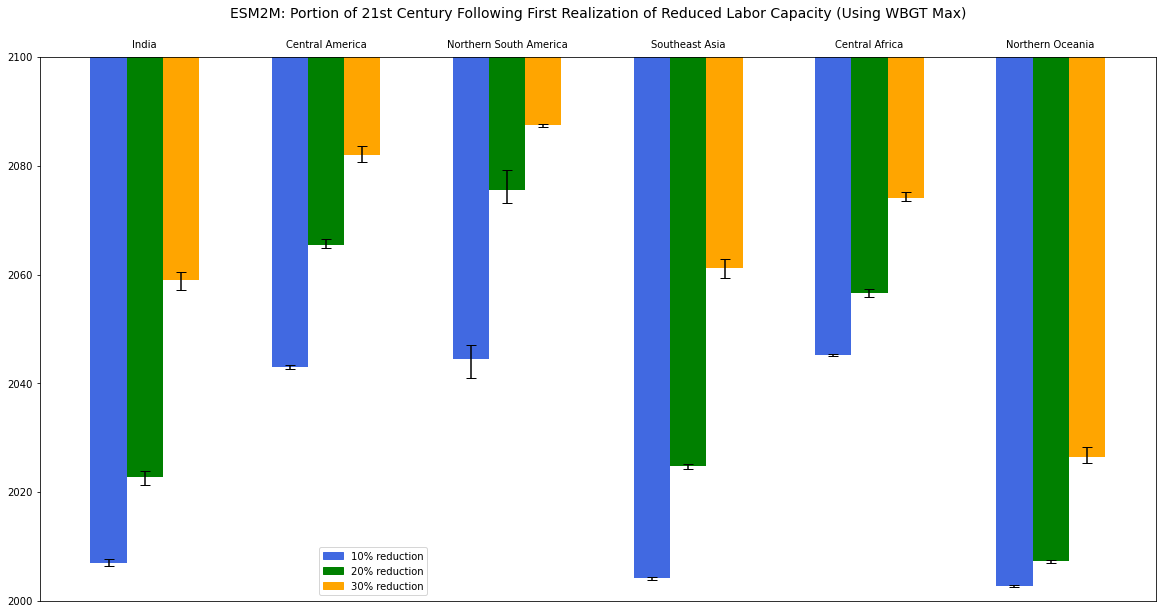

In [12]:
lf.average_toe_bar(ds_max['capacity'],ds_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Max)\n')

# Bar Charts: ToE of Average

## Daily Mean WBGT

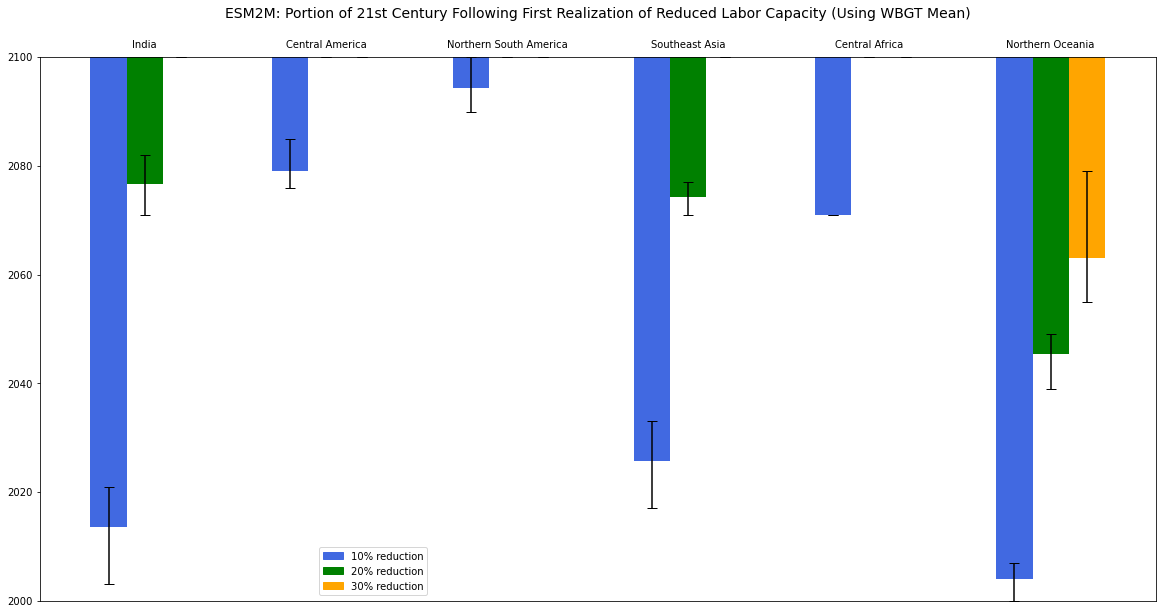

In [19]:
lf.toe_bar(ds_mean,ds_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n')

# Daily Max WBGT

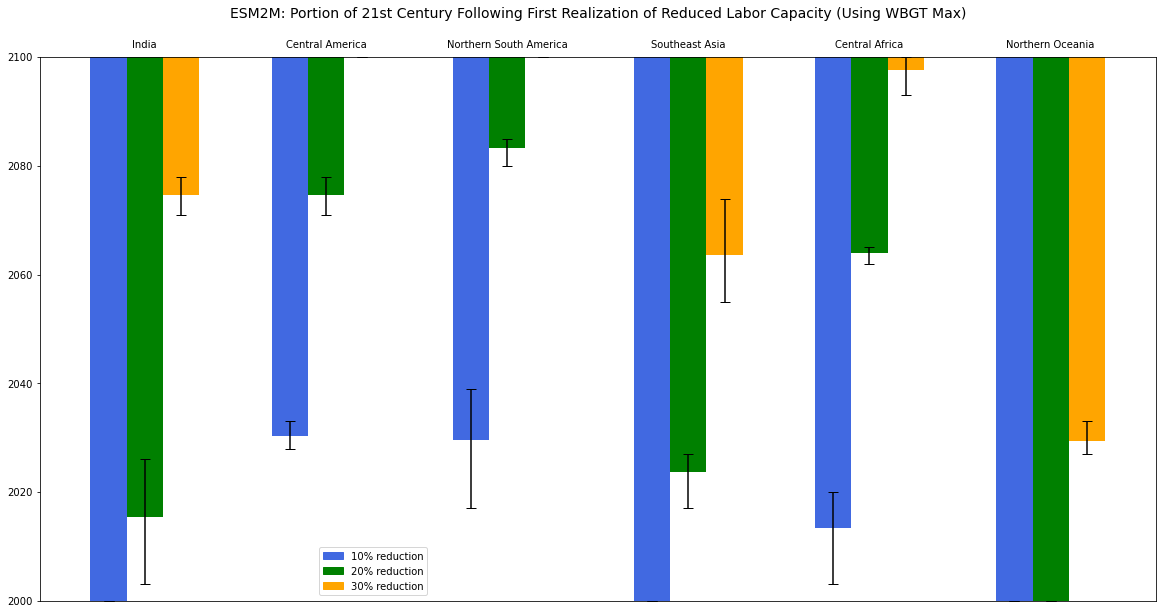

In [18]:
lf.toe_bar(ds_max,ds_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Max)\n')

# Area Emerged

In [43]:
# Load area data
land_area = xr.open_dataset('../data/processed/GFDL/esm2m.land_area')['land_area']
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0)

In [53]:
ds_mean_adj = ds_mean.isel(time=slice(30,None))
ds_max_adj = ds_max.isel(time=slice(30,None))

## WBGT Mean

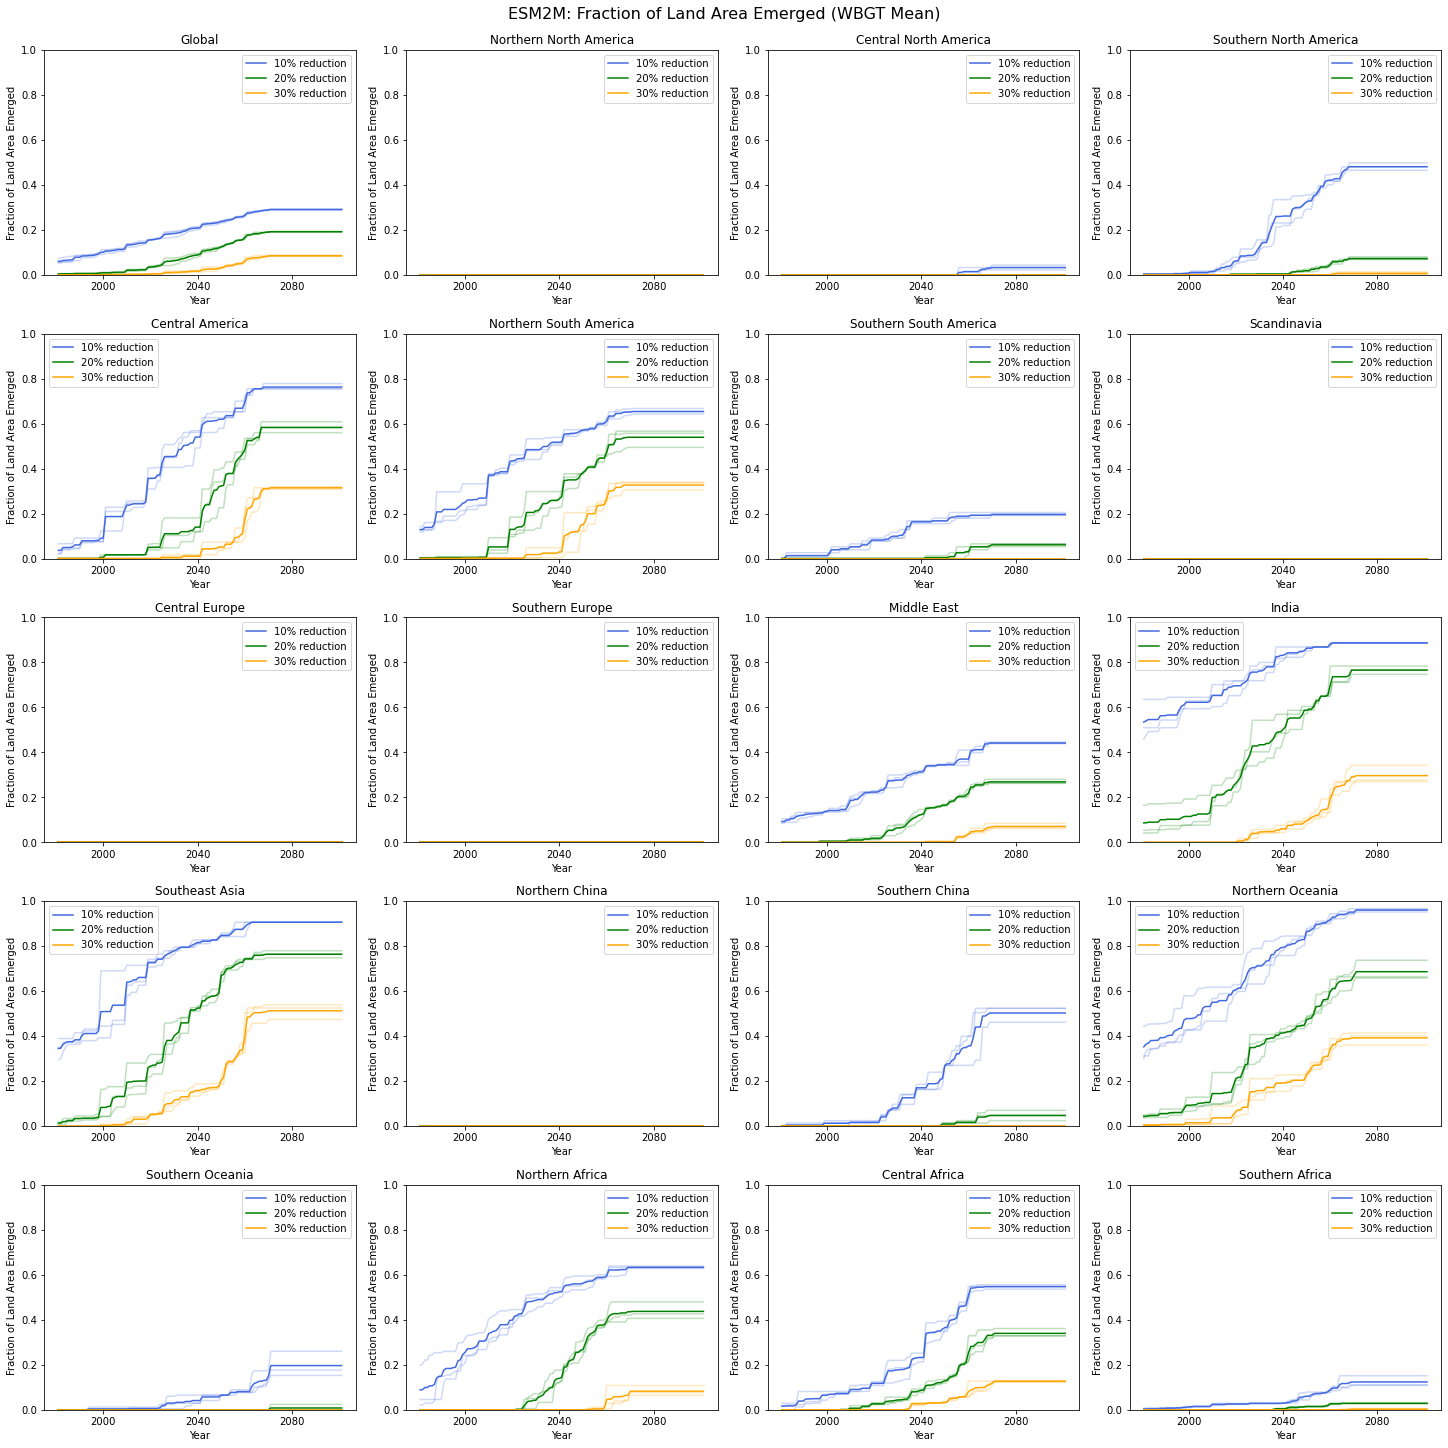

In [54]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_mean_adj['capacity'],region,'GFDL')
    ds_area = lf.slice_region(land_area_adj,region,'GFDL')
    
    lf.area_emerge_plot(ds_region,ds_area,region,'Fraction of Land Area Emerged',ax,start_year=1950)
    
fig.suptitle('ESM2M: Fraction of Land Area Emerged (WBGT Mean)',fontsize=16);
plt.savefig('esm2m_mean_frac_area_emerge.png')

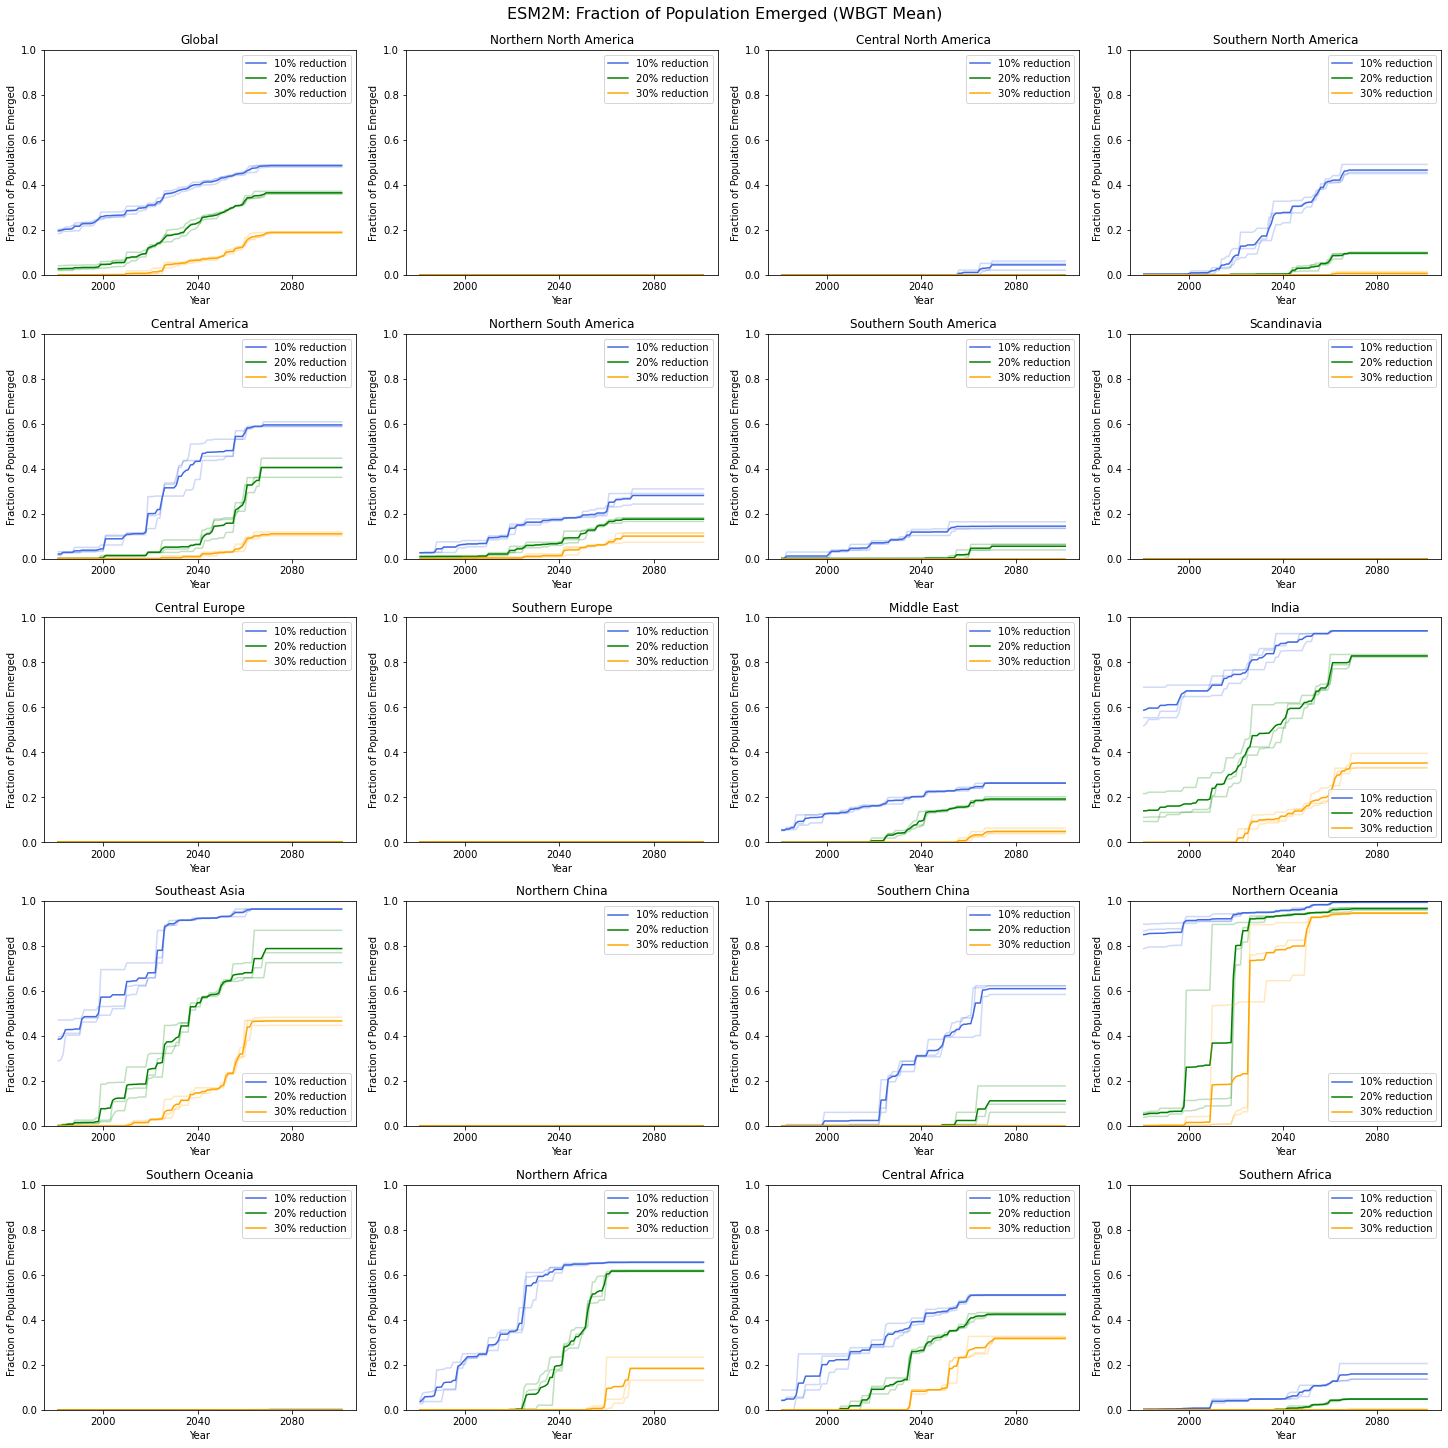

In [56]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_mean_adj['capacity'],region,'GFDL')
    pop_region = lf.slice_region(ds_pop,region,'GFDL')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax,start_year=1950)
    
fig.suptitle('ESM2M: Fraction of Population Emerged (WBGT Mean)',fontsize=16);
plt.savefig('esm2m_mean_frac_pop_emerge.png')

## WBGT Max

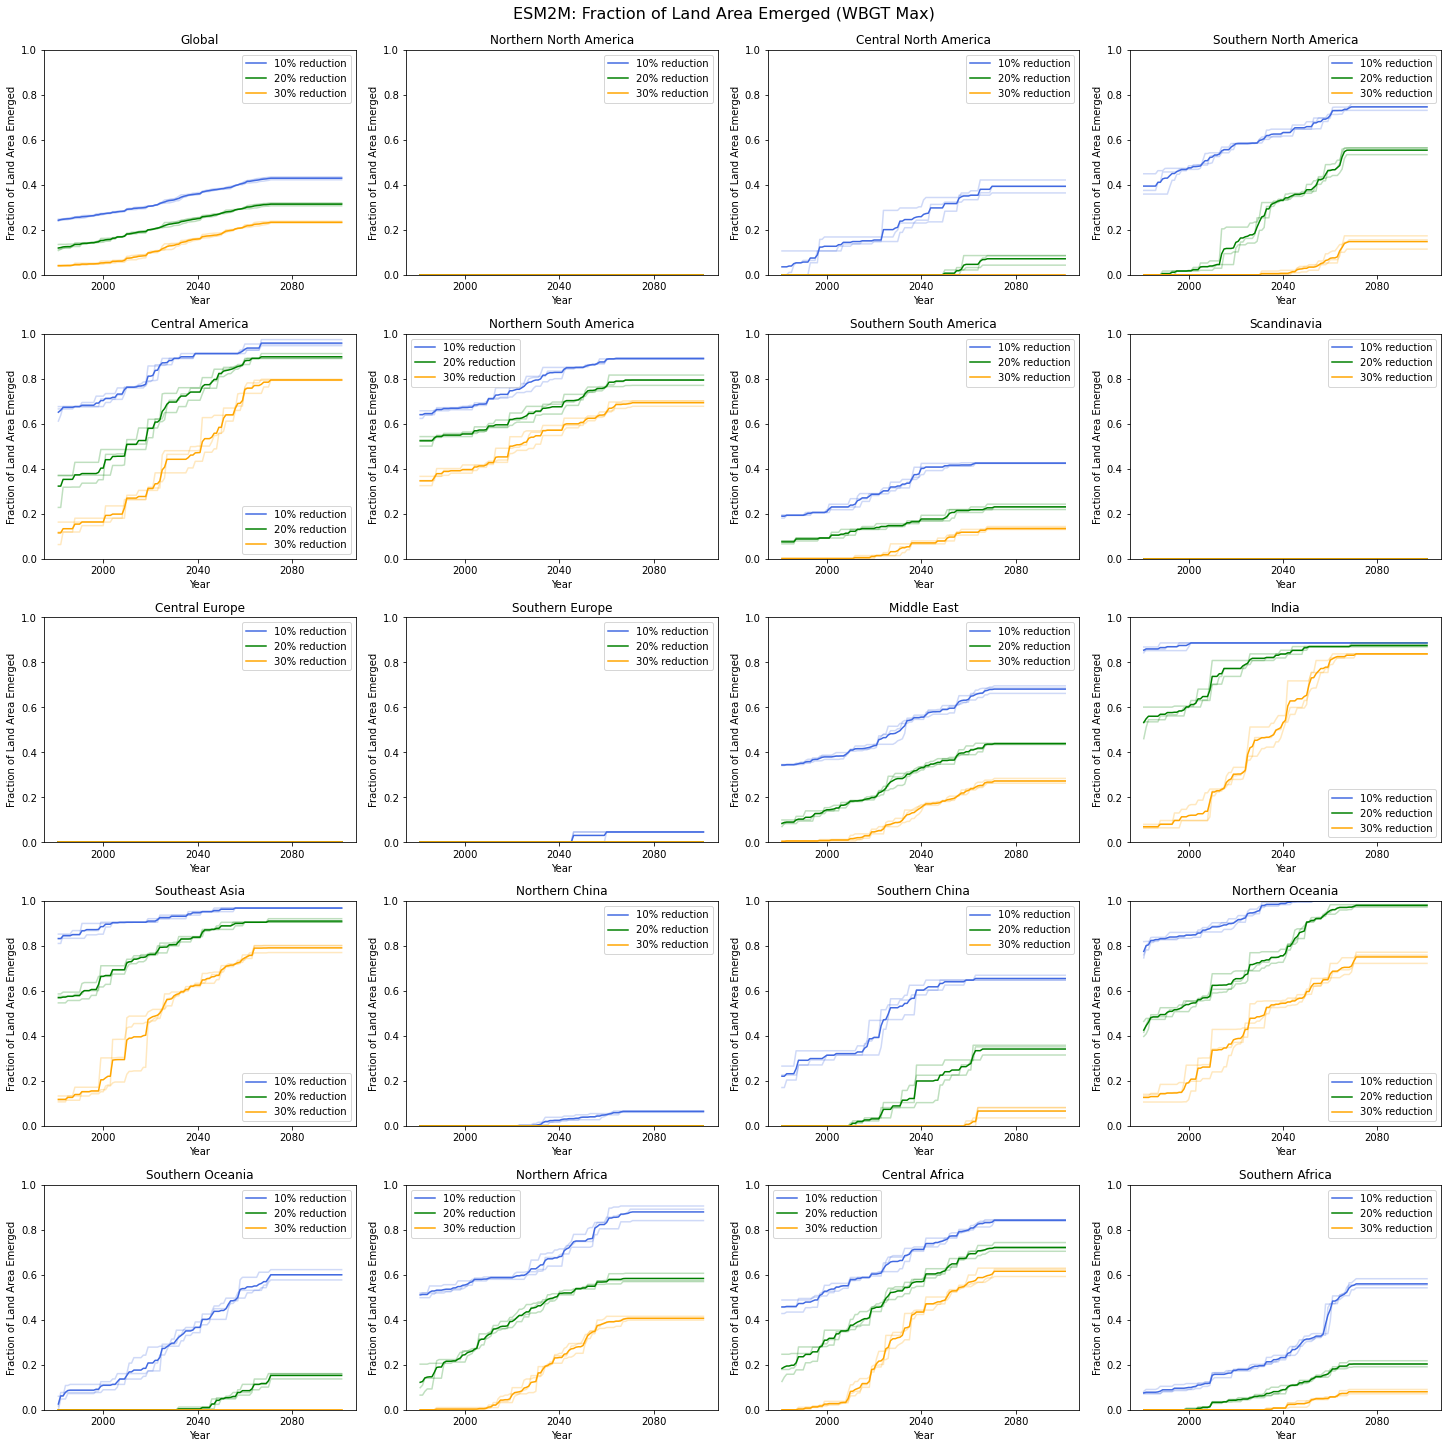

In [55]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_max_adj['capacity'],region,'GFDL')
    ds_area = lf.slice_region(land_area_adj,region,'GFDL')
    
    lf.area_emerge_plot(ds_region,ds_area,region,'Fraction of Land Area Emerged',ax,start_year=1950)
    
fig.suptitle('ESM2M: Fraction of Land Area Emerged (WBGT Max)',fontsize=16);
plt.savefig('esm2m_max_frac_area_emerge.png')

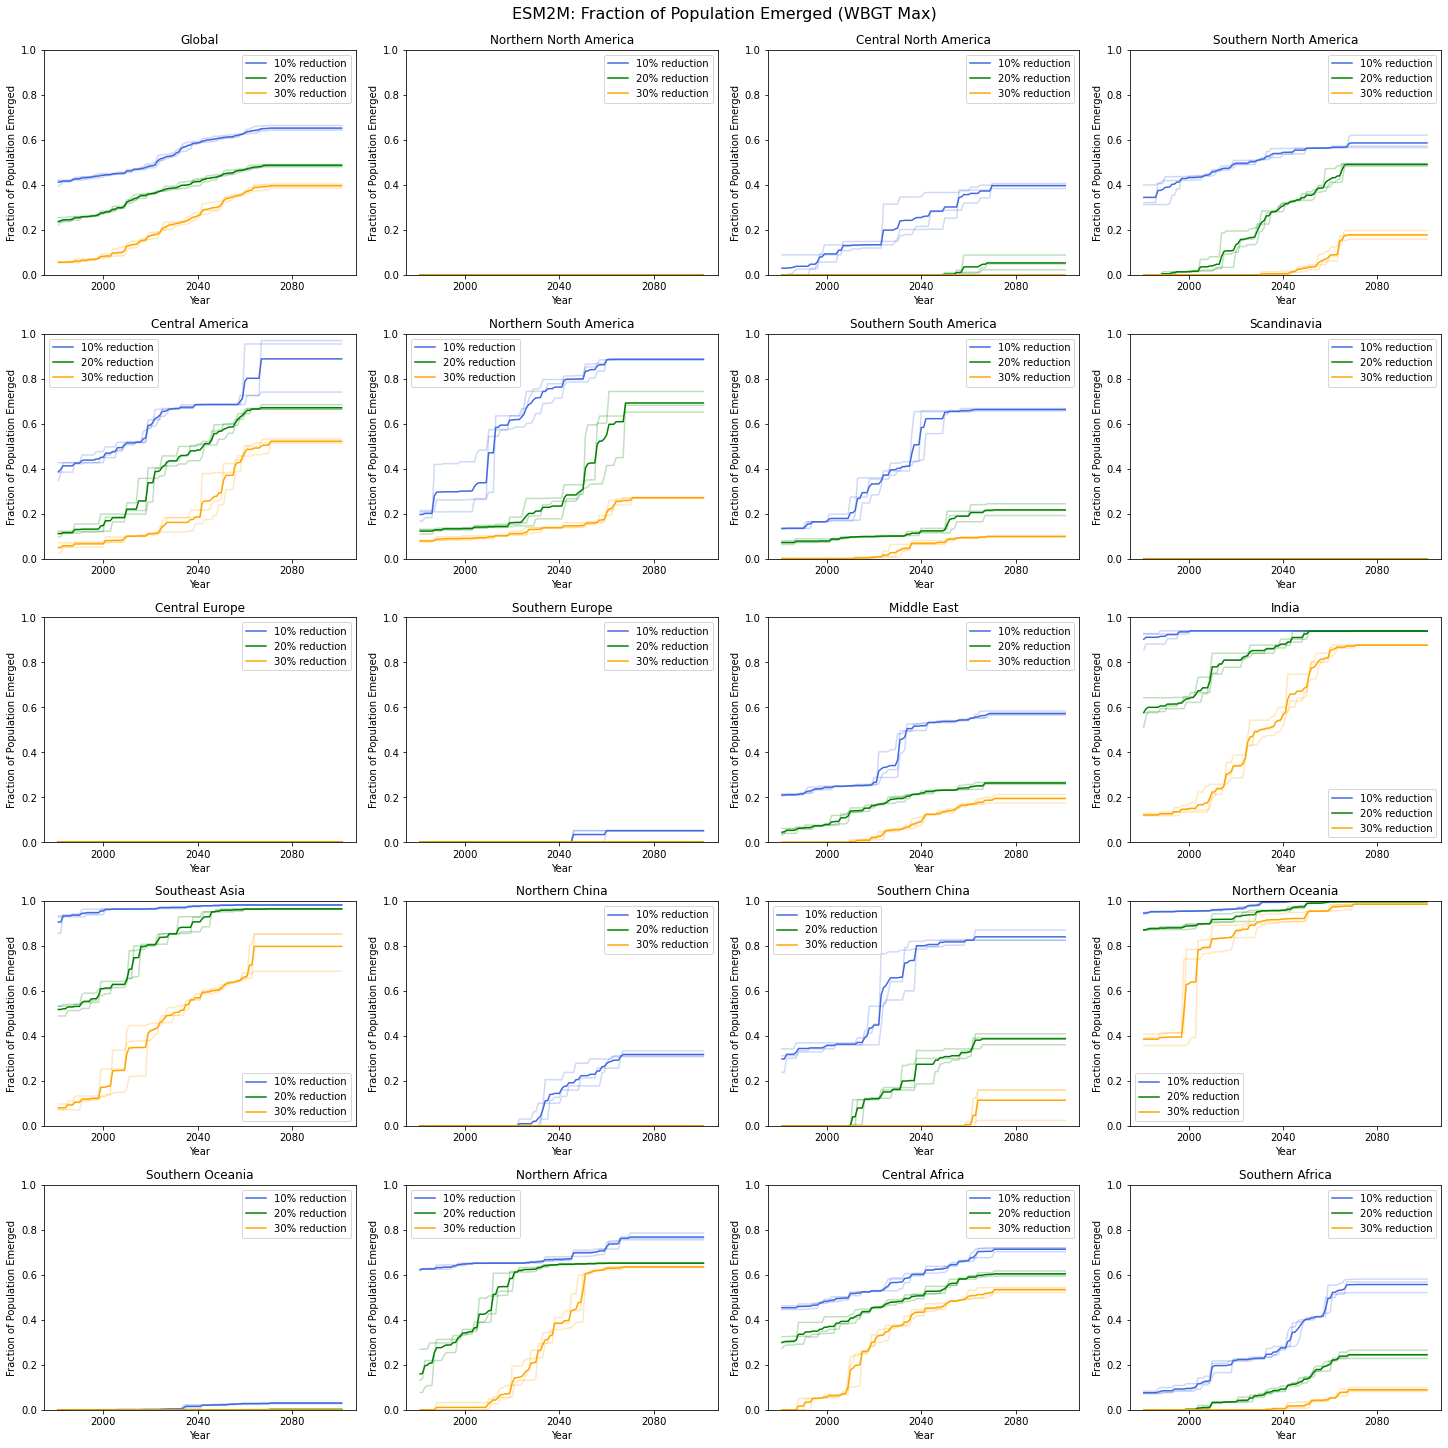

In [58]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_max_adj['capacity'],region,'GFDL')
    pop_region = lf.slice_region(ds_pop,region,'GFDL')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax,start_year=1950)
    
fig.suptitle('ESM2M: Fraction of Population Emerged (WBGT Max)',fontsize=16);
plt.savefig('esm2m_max_frac_pop_emerge.png')